# Análise Exploratória de Dados (EDA)
### Problema a ser resolvido:

O problema a ser resolvido neste projeto é a identificação dos principais fatores que levam ao churn dos clientes e o desenvolvimento de estratégias eficazes para reduzir essa taxa de saída. Utilizando a base de dados do banco, o objetivo é responder às seguintes perguntas:

1. Quais são os fatores mais relevantes que influenciam os clientes a deixarem o banco? 

2. Existem padrões específicos relacionados a localização geográfica ou perfil demográfico?

3. Como o comportamento dos clientes que deixam o banco se diferencia daqueles que permanecem?

4. Quais características devem ser priorizadas para estratégias de retenção?


In [1741]:
# É necessário importar as biliotecas que serão úteis para a análise exploratória.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


In [1742]:
# Importando a base de dados atualizada (pós tratamento).
base_atualizada = pd.read_csv('BASE_FINAL.csv')

In [1743]:
# Verificação da base de dados.
base_atualizada.head()

,Id Cliente,Sobrenome,Pontuacao Credito,Pais,Genero,Idade,Tempo De Vinculo,Saldo,Numero De Produtos,Possui Cartao Credito,Membro Ativo,Salario Estimado,Saiu
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [1744]:
# Excluindo colunas que não serão necessárias.
base_atualizada.drop(columns=['Id Cliente'], inplace= True)
base_atualizada.drop(columns = ['Sobrenome'], inplace = True ) 
base_atualizada.head()

,Pontuacao Credito,Pais,Genero,Idade,Tempo De Vinculo,Saldo,Numero De Produtos,Possui Cartao Credito,Membro Ativo,Salario Estimado,Saiu
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [1745]:
# Verificação das informações gerais da base atualizada.
base_atualizada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Pontuacao Credito      10000 non-null  int64  
 1   Pais                   10000 non-null  object 
 2   Genero                 10000 non-null  object 
 3   Idade                  10000 non-null  int64  
 4   Tempo De Vinculo       10000 non-null  int64  
 5   Saldo                  10000 non-null  float64
 6   Numero De Produtos     10000 non-null  int64  
 7   Possui Cartao Credito  10000 non-null  int64  
 8   Membro Ativo           10000 non-null  int64  
 9   Salario Estimado       10000 non-null  float64
 10  Saiu                   10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [1746]:
# Verificação estatística do Dataframe.
base_atualizada.describe()

,Pontuacao Credito,Idade,Tempo De Vinculo,Saldo,Numero De Produtos,Possui Cartao Credito,Membro Ativo,Salario Estimado,Saiu
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### Dicionário dos Dados
- Id Cliente: Identificador único de cada cliente no banco.

- Sobrenome: Sobrenome do cliente.

- Pontuação Crédito: Pontuação de crédito atribuída ao cliente, que reflete seu histórico de crédito.

- País: Localização geográfica do cliente (país de residência).

- Gênero: Gênero do cliente (masculino ou feminino).

- Idade: Idade do cliente.

- Tempo sendo cliente: Número de anos em que o cliente mantém uma conta no banco.

- Saldo: Saldo disponível na conta do cliente.

- Número De Produtos: Número de produtos ou serviços financeiros que o cliente utiliza no banco.

- Possui Cartão Crédito: Indica se o cliente possui um cartão de crédito emitido pelo banco (1 para sim, 0 para não).


- Membro Ativo: Indica se o cliente é um membro ativo, ou seja, utiliza regularmente os serviços do banco (1 para sim, 0 para não).

- Salário Estimado: Estimativa do salário anual do cliente.

- Saiu: Indica se o cliente saiu do banco (1 para sim, 0 para não).

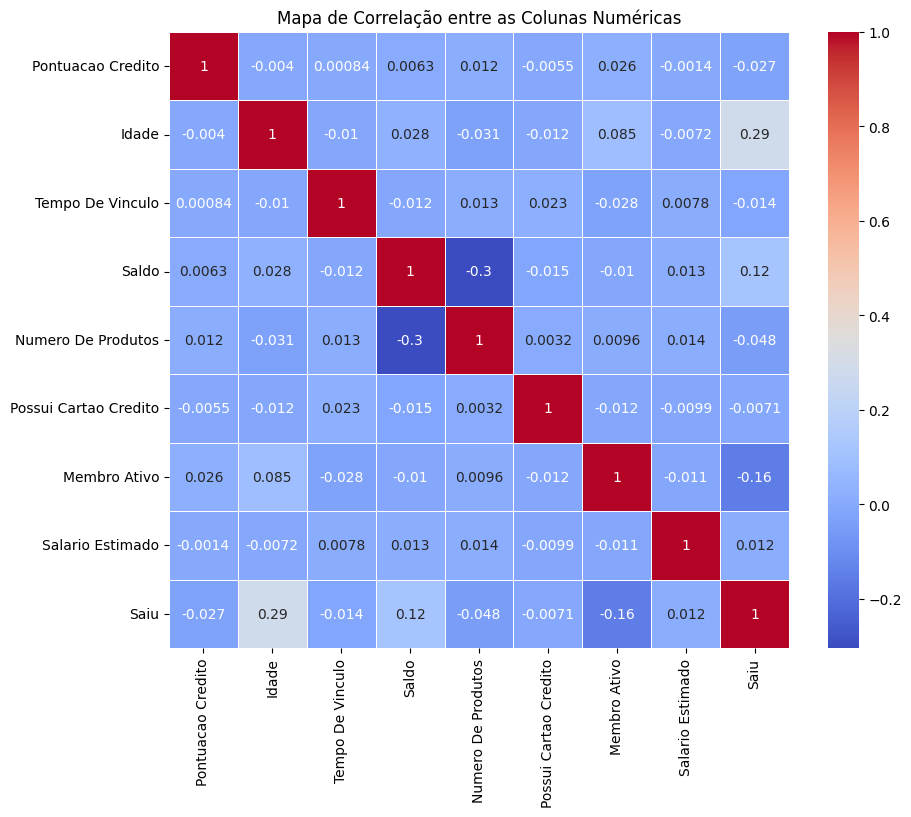

In [1747]:
# Gerando o mapa de correlação da 'base_atualizada'.

# Selecionar apenas colunas numéricas.
colunas_numericas = base_atualizada.select_dtypes(include=['float64', 'int64'])

# Inicializar o MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Aplicar a escala min-max em todas as colunas numéricas do DataFrame
base_final_scaled = scaler.fit_transform(colunas_numericas)

# Calcular a correlação entre as colunas numéricas
correlacao = pd.DataFrame(base_final_scaled, columns=colunas_numericas.columns).corr()

# Configurar o tamanho do gráfico
plt.figure(figsize=(10, 8))

# Criar o mapa de calor
sns.heatmap(correlacao, annot=True, cmap='coolwarm', linewidths=0.5)

# Título do gráfico
plt.title('Mapa de Correlação entre as Colunas Numéricas')

# Mostrar o gráfico
plt.show()



### 1- Fatores Relevantes
Vamos explorar as principais correlações identificadas para obter insights importantes. Para isso, iremos dividir a base atualizada em duas partes distintas: uma que representa os clientes que saíram e outra que representa os clientes que ficaram. Em seguida, vamos criar gráficos comparativos para analisar as correlações mais significativas que podem ter influenciado no churn dos clientes.  
                        


In [1748]:
# Divisão da base de dados.
clientes_churn = base_atualizada[base_atualizada['Saiu'] == 1]
clientes_stay = base_atualizada[base_atualizada['Saiu'] == 0]

In [1749]:
# Verificação da base 'clientes_churn'.
clientes_churn.head()

,Pontuacao Credito,Pais,Genero,Idade,Tempo De Vinculo,Saldo,Numero De Produtos,Possui Cartao Credito,Membro Ativo,Salario Estimado,Saiu
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
16,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1


In [1750]:
# Verificando a base 'clientes_stay'.
clientes_stay.head()

,Pontuacao Credito,Pais,Genero,Idade,Tempo De Vinculo,Saldo,Numero De Produtos,Possui Cartao Credito,Membro Ativo,Salario Estimado,Saiu
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0


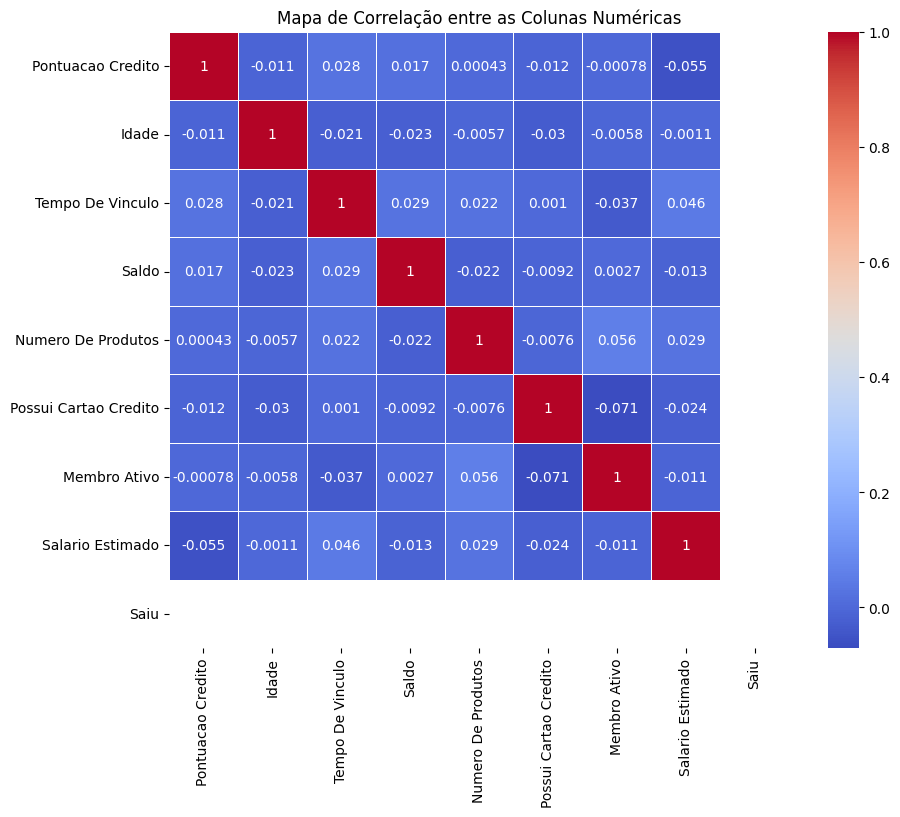

In [1751]:
# Plotando o mapa de correlação entre as colunas numéricas da base 'clientes_churn'.
# Selecionar apenas colunas numéricas
colunas_numericas = clientes_churn.select_dtypes(include=['float64', 'int64'])

# Inicializar o MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Aplicar a escala min-max em todas as colunas numéricas do DataFrame
base_final_scaled = scaler.fit_transform(colunas_numericas)

# Calcular a correlação entre as colunas numéricas
correlacao = pd.DataFrame(base_final_scaled, columns=colunas_numericas.columns).corr()

# Configurar o tamanho do gráfico
plt.figure(figsize=(10, 8))

# Criar o mapa de calor
sns.heatmap(correlacao, annot=True, cmap='coolwarm', linewidths=0.5)

# Título do gráfico
plt.title('Mapa de Correlação entre as Colunas Numéricas')

# Mostrar o gráfico
plt.show()

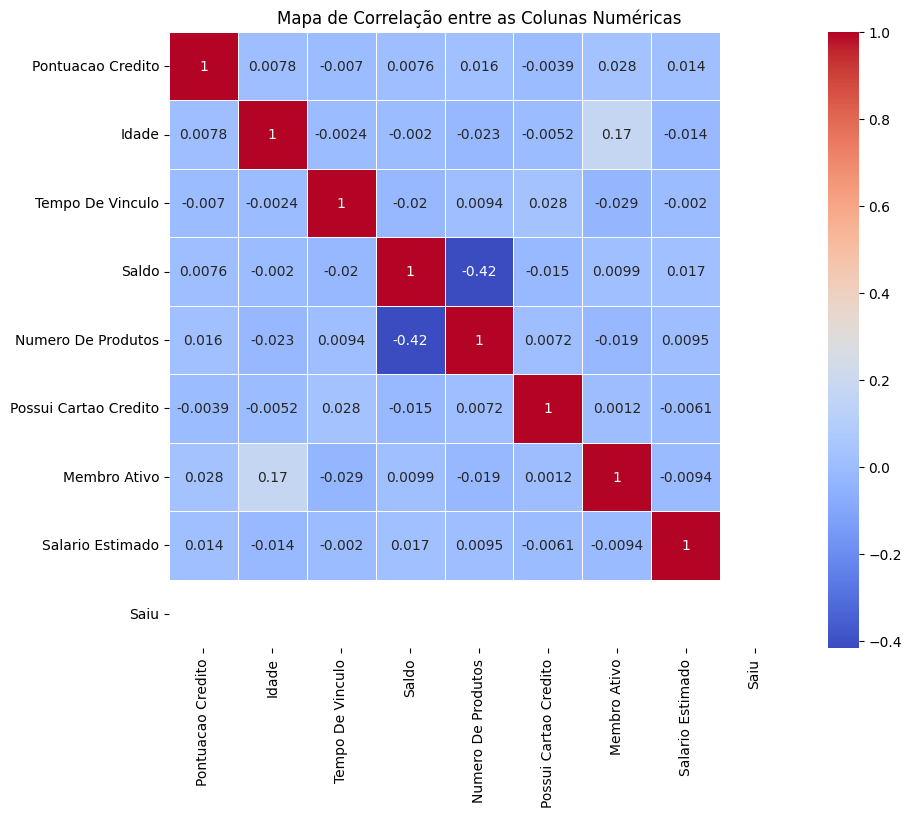

In [1752]:
# Plotando o mapa de correlação entre as colunas numéricas da base 'clientes_stay'.


# Selecionar apenas colunas numéricas
colunas_numericas = clientes_stay.select_dtypes(include=['float64', 'int64'])

# Inicializar o MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Aplicar a escala min-max em todas as colunas numéricas do DataFrame
base_final_scaled = scaler.fit_transform(colunas_numericas)

# Calcular a correlação entre as colunas numéricas
correlacao = pd.DataFrame(base_final_scaled, columns=colunas_numericas.columns).corr()

# Configurar o tamanho do gráfico
plt.figure(figsize=(10, 8))

# Criar o mapa de calor
sns.heatmap(correlacao, annot=True, cmap='coolwarm', linewidths=0.5)

# Título do gráfico
plt.title('Mapa de Correlação entre as Colunas Numéricas')

# Mostrar o gráfico
plt.show()

In [1753]:
# Analisando as faixas etárias com maior incidência de churn.

# Agrupando as idades em faixas etárias.
faixa_etaria = pd.cut(clientes_churn['Idade'], bins=[0, 34, 40, 45, 50, 55, 60, 65, 100], right=True, 
                       labels=['Abaixo de 35', '35-40', '41-45', '46-50', '51-55', '56-60', '61-65', '66+'])

# Contar as ocorrências em cada faixa etária
contagem_faixa_etaria = faixa_etaria.value_counts().sort_index()

contagem_faixa_etaria



Idade
Abaixo de 35    290
35-40           396
41-45           394
46-50           394
51-55           269
56-60           179
61-65            80
66+              35
Name: count, dtype: int64


Observa-se uma maior concentração de churn entre clientes na faixa etária de **35 a 50 anos**, que representa **58,1%** do total. Essa tendência pode indicar que estratégias específicas são necessárias para abordar e reter clientes dentro dessas idades, potencialmente desenvolvendo ofertas ou programas de fidelidade que atendam melhor a esse grupo. 

Para aprofundar essa análise, vamos gerar visualizações gráficas que ajudem a compreender melhor esses padrões.

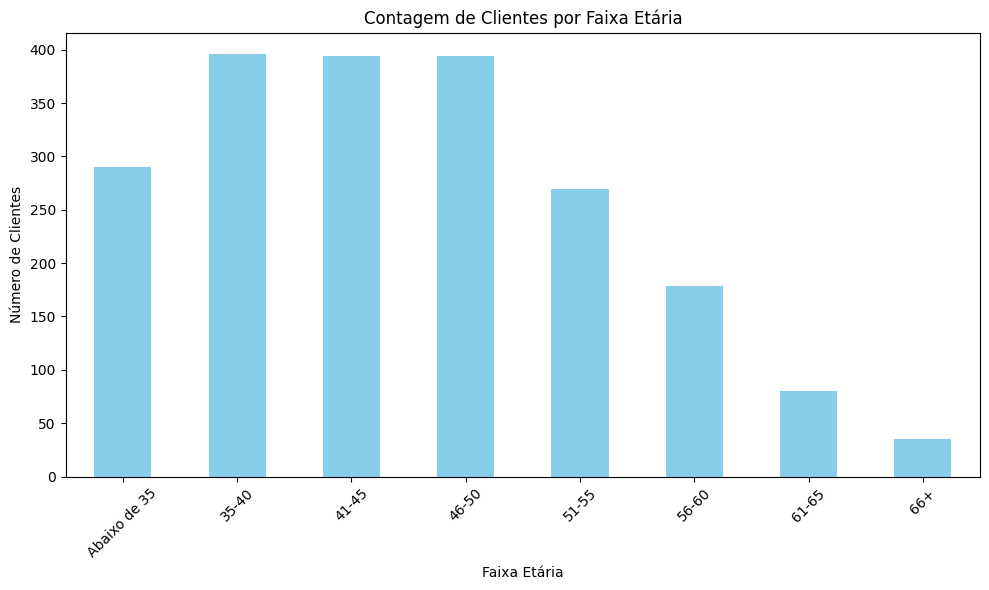

In [1754]:
# Visualizando as informações graficamente.

# Criando gráfico de barras
plt.figure(figsize=(10, 6))
contagem_faixa_etaria.plot(kind='bar', color='skyblue')

# Adicionando título e rótulos
plt.title('Contagem de Clientes por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Número de Clientes')

# Exibir gráfico
plt.xticks(rotation=45)
plt.tight_layout()  # Ajustar layout
plt.show()


**A partir dos 51 anos, observa-se uma queda gradual no número de churns**. Isso pode indicar que os clientes mais velhos tendem a ser mais fiéis, possivelmente devido a hábitos de uso ou menos disposição para mudanças.

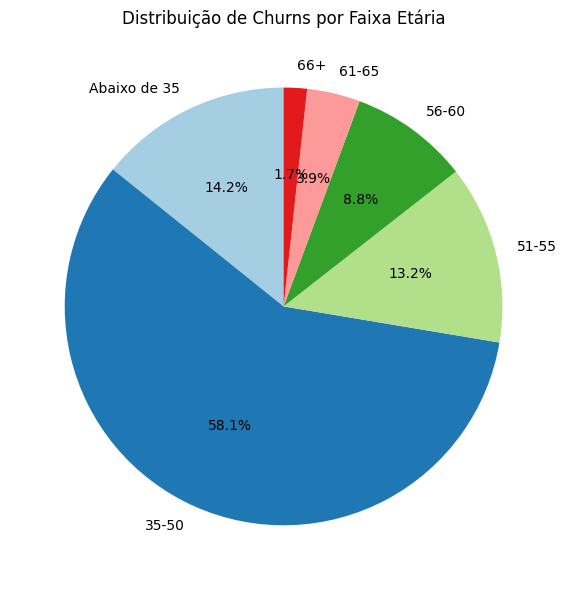

In [1755]:
# Plotando gráfico de pizza.
# Dados das faixas etárias e suas contagens de churn
faixas_etarias = ['Abaixo de 35','35-50', '51-55', '56-60', '61-65', '66+']
contagem_faixas = [290, 1184, 269, 179, 80, 35]

# Criar gráfico de pizza
plt.figure(figsize=(6, 6))
plt.pie(contagem_faixas, labels=faixas_etarias, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Adicionar título
plt.title('Distribuição de Churns por Faixa Etária')

# Exibir gráfico
plt.tight_layout()
plt.show()


**A soma das faixas etárias de 35 a 50 anos corresponde a 58.1% de todos os churns**. Isso destaca essa faixa etária como um grupo chave que deve estar enfrentando mais insatisfação com o serviço ou produtos oferecidos, merecendo uma atenção especial.

### Insights
A faixa de 35 a 50 é a mais crítica em termos de churn, sugerindo que as estratégias de retenção precisam ser mais intensivas para esses clientes.

Embora a taxa de churn seja menor entre os clientes mais jovens, é crucial desenvolver estratégias para mantê-los engajados à medida que envelhecem e se aproximam de faixas etárias com maiores índices de churn.



### Conclusão
A análise revelou uma **clara concentração de churn entre os clientes na faixa etária de 35 a 50 anos**, indicando que essa faixa merece atenção especial nas estratégias de retenção. Em contraste, a queda gradual nas taxas de churn a partir dos 51 anos sugere que os clientes mais velhos tendem a ser mais fiéis, possivelmente devido a hábitos de uso mais consolidados e a uma menor disposição para mudanças. 

Portanto, é fundamental investigar os motivos da insatisfação entre os clientes de 35 a 50 anos. Realizar pesquisas qualitativas ou grupos focais pode fornecer uma compreensão mais profunda das necessidades e expectativas desse grupo, permitindo que as estratégias de retenção sejam mais eficazes.

Além disso, observa-se que não há correlações fortes entre as colunas, especialmente em relação à coluna 'Saiu'. Isso sugere que as motivações para o churn podem não estar tão relacionadas às variáveis numéricas, mas sim às variáveis categóricas, como 'País' e 'Gênero'. Portanto, é essencial investigar essas variáveis para entender melhor os fatores que influenciam a decisão dos clientes de deixar o serviço.



### 2 - Impacto da Demografia

Vamos aprofundar nossa análise na demografia dos clientes, buscando entender melhor como características como localização geográfica e gênero influenciam o churn no banco europeu. Para isso, iremos investigar padrões específicos que possam nos ajudar a compreender quais perfis de clientes têm maior probabilidade de deixar o banco.

A análise irá considerar variáveis como a região em que residem e a distribuição entre os gêneros. Ao examinar esses dados de forma mais detalhada, esperamos identificar tendências que possam explicar a relação entre demografia e churn, oferecendo insights valiosos para a formulação de estratégias de retenção.


In [1756]:
# Verificando os churns de cada país.
porcentagem = base_atualizada.groupby('Pais')['Saiu'].agg(['count', 'sum'])
porcentagem['Porcentagem de Saída'] = round((porcentagem['sum'] / porcentagem['count']) * 100, 3)
porcentagem

,count,sum,Porcentagem de Saída
Pais,,,
France,5014,810,16.155
Germany,2509,814,32.443
Spain,2477,413,16.673


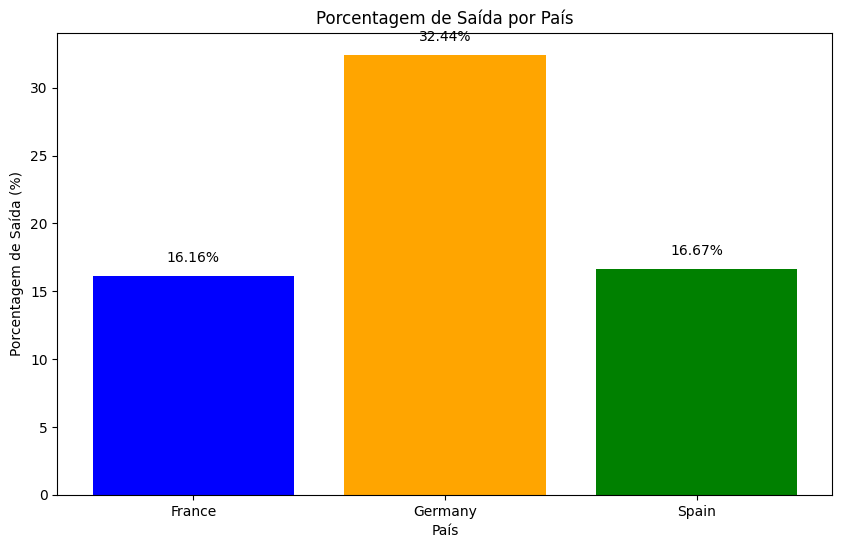

In [1757]:
# Plotando o gráfico das porcentagens de churn por país.

# Configurar o gráfico
plt.figure(figsize=(10, 6))
plt.bar(porcentagem.index, porcentagem['Porcentagem de Saída'], color=['blue', 'orange', 'green'])

# Adicionar título e rótulos
plt.title('Porcentagem de Saída por País')
plt.xlabel('País')
plt.ylabel('Porcentagem de Saída (%)')

# Adicionar rótulos nas barras
for i in range(len(porcentagem)):
    plt.text(i, porcentagem['Porcentagem de Saída'].iloc[i] + 1, f"{porcentagem['Porcentagem de Saída'].iloc[i]:.2f}%", ha='center')

# Exibir o gráfico
plt.show()


### Insights sobre Churn no Banco Europeu

Observa-se que a Alemanha se destaca como o país com a maior porcentagem de churn, refletindo um cenário preocupante para a instituição financeira. Este país apresenta quase o dobro de churns em comparação com os demais países onde o banco opera, o que sugere uma questão mais profunda em relação à satisfação e ao engajamento dos clientes nesse mercado específico. 

Diante dessa realidade, torna-se essencial implementar uma estratégia robusta de retenção de clientes, com foco particular na Alemanha. Ações direcionadas podem incluir programas de fidelização mais atrativos, melhorias nos serviços oferecidos e um acompanhamento mais próximo das necessidades e feedbacks dos clientes. O objetivo primordial deve ser reduzir a quantidade de churns nesse país, promovendo um ambiente mais favorável e satisfatório para a base de clientes alemã, que, se bem cuidada, pode se transformar em um ativo valioso para o banco no longo prazo.

In [1758]:
porcentagem1 = base_atualizada.groupby('Genero')['Saiu'].agg(['count', 'sum'])
porcentagem1['Porcentagem de Saída'] = round((porcentagem1['sum'] / porcentagem1['count']) * 100, 3)
porcentagem1

,count,sum,Porcentagem de Saída
Genero,,,
Female,4543,1139,25.072
Male,5457,898,16.456


### Comparação Geral de Churns por Gênero

Feminino: 4.543 clientes, com uma quantidade de 1.139 churns.

Masculino: 5.457 clientes, com uma quantidade de 898 churns.

A porcentagem de saída entre as clientes femininas foi de 25.07%, enquanto que entre os clientes masculinos foi de 16.46%.

Esses dados revelam uma porcentagem 52,3% maior de churns femininos em comparação com os masculinos, indicando que as mulheres estão mais propensas a deixar o banco.

In [1759]:
# Verificando os churns por País e por Gênero

# Agrupar contagens de churn por país e gênero
contagens_churn = clientes_churn.groupby(['Pais', 'Genero']).size().reset_index(name='Contagem')

# Calcular o total de churns por país
total_por_pais = clientes_churn.groupby('Pais').size().reset_index(name='Total_Churns')

# Realizar o merge
resultado = pd.merge(contagens_churn, total_por_pais, on='Pais')

# Calcular a porcentagem
resultado['Porcentagem'] = (resultado['Contagem'] / resultado['Total_Churns']) * 100

# Drop de coluna desnecessário
resultado.drop(columns = 'Total_Churns', inplace = True)

# Exibir o resultado
resultado


,Pais,Genero,Contagem,Porcentagem
0,France,Female,460,56.790123
1,France,Male,350,43.209877
2,Germany,Female,448,55.036855
3,Germany,Male,366,44.963145
4,Spain,Female,231,55.932203
5,Spain,Male,182,44.067797


### Insights sobre Churn no Banco Europeu

Após a análise dos dados de churn no banco europeu, diversas informações relevantes foram descobertas, destacando diferenças significativas entre os gêneros e suas respectivas taxas de saída.

Os dados também foram segmentados por país, permitindo uma análise mais granular das taxas de churn.

As informações acima mostram que, em todos os países analisados (França, Alemanha e Espanha), as mulheres apresentam uma porcentagem de churn superior à dos homens. Em particular, as taxas de churn feminino são consistentemente mais altas, indicando uma possível necessidade de revisar as estratégias de retenção para este segmento.

### Conclusão
Esses insights podem fornecer direções estratégicas importantes para o banco. A diferença significativa nas taxas de churn entre gêneros e países é um indicativo de que ações específicas, como programas de engajamento direcionados ou melhorias nos serviços oferecidos, podem ser necessárias para reduzir a taxa de saída entre as clientes femininas.